# P2 Investigate a Dataset

## Titanic Data - Analysis of Survivor Characteristics 

#### Dominic Nguyen

### Introduction

The Titanic was a tragic event in 1912 in which a British passenger ship sank with more than 1500 of the estimated 2224 passengers onboard in the Atlantic Ocean. Data of many passengers, both those who survived and those who did not, has been compiled over the years and recently published. With today's new technology, answering questions through data analysis is now easier than ever. Thus, an analysis of the Titanic data from Kaggle has been conducted using Python, Jupyter Notebook, and a variety of Python libraries (Pandas, NumPy, Seaborn, Matplotlib) to answer the following question.

**Big Question**: What factors made people more likely to survive the sinking of the Titanic?

We will begin by retrieving and reading the data from the csv file from Kaggle.

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
%matplotlib inline

In [2]:
original_df = pd.read_csv('titanic-data.csv')

print '# of passengers in original data: ' + str(len(original_df.index)) + '\n'
original_df.head()

# of passengers in original data: 891



,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Data Wrangling

Before delving into analyzing the data, it is important to ensure there are no incorrect or missing values that could bias our results.
It was determined that a few columns in the data had nonexistent values.

In [3]:
print original_df.isnull().sum() # Print number of passengers which have NaN in each column.

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


Thus, data was cleaned to remove any passengers who did not have an explicit age (177 passengers) or embarking station (2 passengers). Passengers who did not have an assigned cabin were not removed as it is likely only one person booked the cabin for multiple passengers. Removing these passengers would result in a very small sample that would not be sufficient to accurately draw conclusions.

In [4]:
age_wrangled_df = original_df[pd.notnull(original_df['Age'])]
print '# of passengers in age wrangled data: ' + str(len(age_wrangled_df.index)) + '\n'

embark_wrangled_df = age_wrangled_df[pd.notnull(age_wrangled_df['Embarked'])]
print '# of passengers in age & embark wrangled data: ' + str(len(embark_wrangled_df.index))

# of passengers in age wrangled data: 714

# of passengers in age & embark wrangled data: 712


### Effect of Gender

With the data wrangling complete, we will start by exploring the effect of gender on survival rate.

In [5]:
# Group data by gender
gender_data = embark_wrangled_df.groupby('Sex', as_index = False)
gender_mean_data = gender_data.mean()

print 'Total Survival Rate: ' + str(embark_wrangled_df['Survived'].mean())

print '\nMean Data by Gender'
gender_mean_data[['Sex', 'Survived', 'Age', 'Pclass', 'SibSp', 'Parch', 'Fare']]

Total Survival Rate: 0.404494382022

Mean Data by Gender


,Sex,Survived,Age,Pclass,SibSp,Parch,Fare
0,female,0.752896,27.745174,2.073359,0.644788,0.714286,47.332433
1,male,0.205298,30.726645,2.335541,0.439294,0.271523,27.268836


On average, women tended to be younger (27.7 years vs 30.7 years) and travel with another person [have a greater number of siblings/spouse (0.64 vs 0.44) and children/parents (0.71 vs 0.27)]. Another interesting finding is that although women in the data on average have a slightly lower socio-economic status (2.07 vs 2.33), their fares were much higher on average as compared to men (\$47 vs \$27).

Let's further investigate the effect of gender on survival rate.

In [6]:
# Find total number of males & females
total_df = gender_data['PassengerId'].count()
total_df.columns = ['Sex','Total']
gender_list = total_df['Sex'] # Save 'Sex' column in list for input in future plot
del total_df['Sex']
# print total_df # Uncomment to see modified dataframe

# Find number of males & females that survived
gender_survived_df = gender_data['Survived'].sum()
del gender_survived_df['Sex']
# print survived_series # Uncomment to see modified dataframe

# Combine series using vectorized operations
combined_df = total_df.add(gender_survived_df, fill_value = 0)

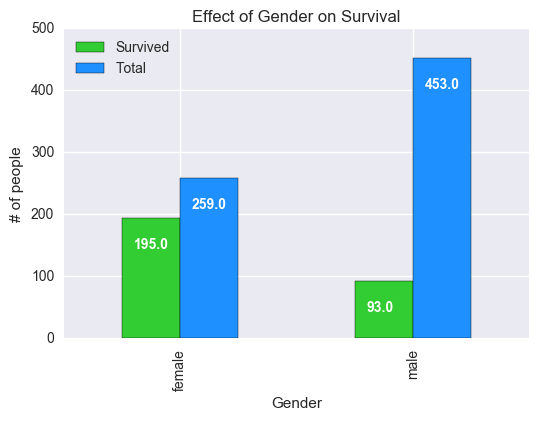

In [7]:
# Create plot
combined_df.plot.bar(color=['limegreen', 'dodgerblue'])
plt.title('Effect of Gender on Survival')
plt.xlabel('Gender')
plt.ylabel('# of people')
plt.xticks(range(len(gender_list)), gender_list)

survival_gender_list = [combined_df.loc[0]['Survived'], combined_df.loc[1]['Survived']]
total_gender_list = [combined_df.loc[0]['Total'], combined_df.loc[1]['Total'] ]

# Define function to create value labels on plots
def create_value_labels(list_data, decimals, x_adjust, y_adjust):
    for x, y in enumerate(list_data):
        plt.text(x + x_adjust, y + y_adjust, round(list_data[x], decimals), color='w', fontweight='bold')
        
create_value_labels(survival_gender_list, 1, -0.2, -50)
create_value_labels(total_gender_list, 1, 0.05, -50)
plt.show()

It appears, on average, women were more than **3** times likely to survive than men. Due to the binary nature of the *'Survived'* field type, we can conclude that 75.3% of the women from the data set survived while only 20.5% of the men survived. Comparing this to an average survival rate of 40.4% and using a N-1 Two Proportion Test, we determined that both the one-tailed and two-tailed p-values are ~ 0.0. Thus, at a ~100% confidence level, the difference between the survival rates between males and females is significant. These results were determined using the web-based Measuring U A/B test calculator (see Sources section for link).

One important thing to note is the sample size of each gender from the wrangled data set; 259 females were on board while 453 men were present.

An explanation for the higher survival rate among women may be the "women and children first" code of conduct that has been strongly associated with the Titanic. According to a study by economists Mikael Elinder and Oscar Erixson from the University of Uppsala in Sweden, the captain of the Titanic gave orders to save the women and children first and "men who tried to reach for the lifeboats were threatened with violence by officers on the ship." This priority to save women first is likely to be the explanation for why women were more likely to survive the Titanic than men.

However, given the differences in other characteristics between women and men determined earlier, here are a few additional questions that may help provide further explanation:
- What is the effect of age on survival rate?
- What is the effect of company (traveling with others) on survival rate?
- What is the effect of socio-economic status on survival rate?

Some of these questions can be answered by simply grouping the data by those who survived and viewing the other characteristics.

In [8]:
# Group data by survivors
survivor_data = embark_wrangled_df.groupby('Survived', as_index = False)
survivor_mean_data = survivor_data.mean()
survivor_mean_data

,Survived,PassengerId,Pclass,Age,SibSp,Parch,Fare
0,0,442.299528,2.485849,30.626179,0.525943,0.365566,22.965456
1,1,457.850694,1.878472,28.193299,0.496528,0.531250,51.647672


Here we can see that survivors, on average, are younger (28.2 years vs 30.6 years), are presumably from a higher socio-economic class [a more luxurious class ticket (1.9 vs 2.5) and higher ticket fare (\$51 vs \$23)], travel with less siblings/spouse (0.50 vs 0.53), and travel with more parents/children (0.53 vs 0.37).

For the rest of the analysis, we will further examine the effect of age and socio-economic status on survival rate.

### Effect of Age

We will now explore the effect of age on survival rate.

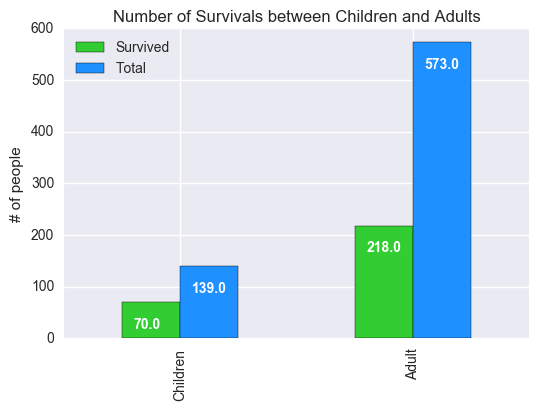

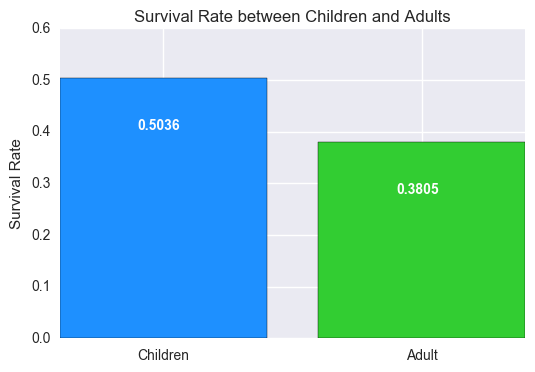

In [9]:
# Split data into children and adults
children_data = embark_wrangled_df[embark_wrangled_df['Age'] <= 18] # Children are passengers with ages <= 18
adult_data = embark_wrangled_df[embark_wrangled_df['Age'] > 18]

# Count number of total & survived children and adults
children_count = children_data['PassengerId'].count()
adult_count = adult_data['PassengerId'].count()
survive_children_count = children_data['Survived'].sum()
survive_adult_count = adult_data['Survived'].sum()

# Put into lists
children_list = [survive_children_count, children_count]
adult_list = [survive_adult_count, adult_count]
total_list = [children_count, adult_count]
survived_list = [survive_children_count, survive_adult_count]

# Create pandas dataframe for counts above
CvsA_df = pd.DataFrame([children_list, adult_list], columns = ['Survived','Total'], index = ['Children', 'Adult'])

# Create plot
CvsA_df.plot.bar(color=['limegreen', 'dodgerblue'])
plt.title('Number of Survivals between Children and Adults')
plt.ylabel('# of people')
plt.xticks(range(len(CvsA_df.index)), CvsA_df.index)

# Add value labels
create_value_labels(survived_list, 1, -0.2, -50)
create_value_labels(total_list, 1, 0.05, -50)
plt.show()

# Create list with survival rates for children and adults
survival_rate_CvsA = [children_data.mean()['Survived'], adult_data.mean()['Survived']]

plt.bar(range(len(survival_rate_CvsA)), survival_rate_CvsA, align='center', color = ['dodgerblue','limegreen'])
plt.title('Survival Rate between Children and Adults')
plt.ylabel('Survival Rate')
plt.xticks(range(len(survival_rate_CvsA)), ['Children','Adult'])

# Add value labels for each category
create_value_labels(survival_rate_CvsA, 4, -0.1, -0.1)
plt.show()

50.7% of the children from the data set survived while 38.1% of adults survived, resulting in children being 1.3 times more likely to survive. Comparing this to an average survival rate of 40.4% and using a N-1 Two Proportion Test, we determined that both the two-tailed p-value was 0.008. Thus, at a 99.2% confidence level, the difference between the survival rates between males and females is significant. These results were also determined using the web-based Measuring U A/B test calculator (see Sources section for link).

The "women and children first" maxim may also be responsible for this difference.

Outside of the difference between the children and adult groups, let's see examine how age affects survival. We will begin by analyzing the distribution of all passengers, survivors, and non-survivors.

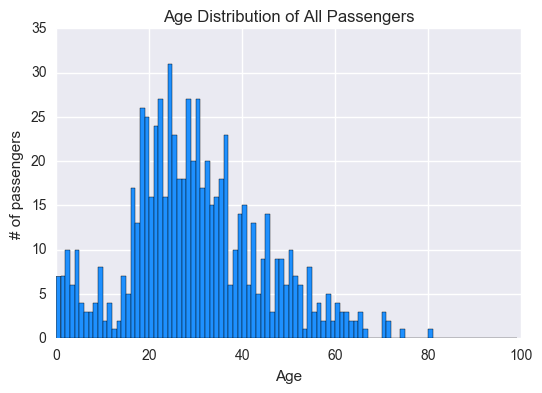

In [10]:
embark_wrangled_df['Age'].plot.hist(bins=range(100), color='dodgerblue')
plt.title('Age Distribution of All Passengers')
plt.xlabel('Age')
plt.ylabel('# of passengers')
plt.show()

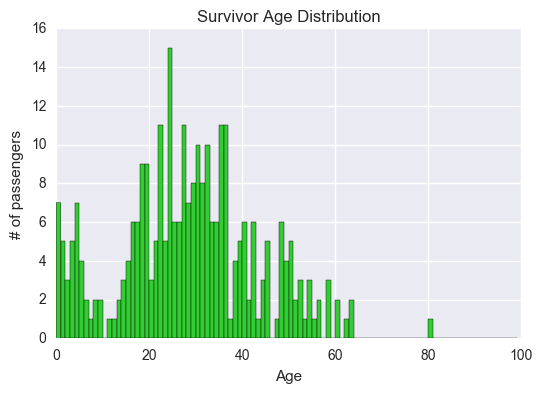

In [11]:
# Split data into survivor dataframe and non-survivor dataframe
survived_data = embark_wrangled_df[embark_wrangled_df['Survived'] == 1]
died_data = embark_wrangled_df[embark_wrangled_df['Survived'] == 0]

# Plot survivor age histogram
survived_data['Age'].hist(bins=range(100), color='limegreen', label='Survived')
plt.xlabel('Age')
plt.title('Survivor Age Distribution')
plt.ylabel('# of passengers')
plt.show()

survived_stats = survived_data['Age'].describe()

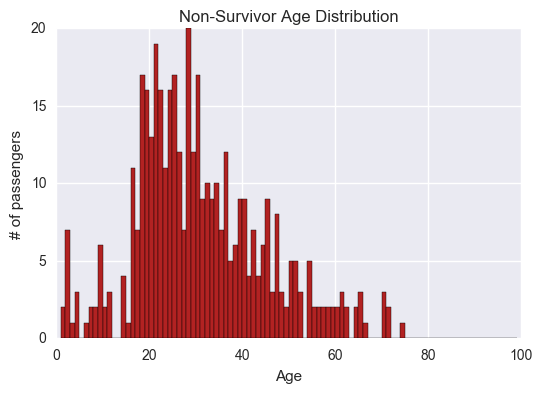

In [12]:
# Plot non-survivor age histogram
died_data['Age'].hist(bins=range(100), color='firebrick', label='Died')
plt.title('Non-Survivor Age Distribution')
plt.xlabel('Age')
plt.ylabel('# of passengers')
plt.show()

died_stats = died_data['Age'].describe()

In [13]:
print "Survivor Age Stats"
print survived_stats
print "\nNon-Survivor Age Stats"
print died_stats

Survivor Age Stats
count    288.000000
mean      28.193299
std       14.859146
min        0.420000
25%       19.000000
50%       28.000000
75%       36.000000
max       80.000000
Name: Age, dtype: float64

Non-Survivor Age Stats
count    424.000000
mean      30.626179
std       14.172110
min        1.000000
25%       21.000000
50%       28.000000
75%       39.000000
max       74.000000
Name: Age, dtype: float64


The distribution of ages of all passengers, survivors, and non-survivors is approximately normal. As mentioned earlier, on average, survivors were younger than non-survivors (28.2 years vs 30.6 years), with an absolute difference in mean ages of 2.4 years. 

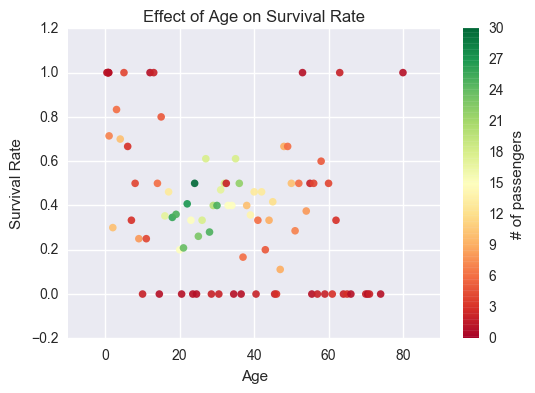

In [14]:
# Group data by age
age_data = embark_wrangled_df.groupby('Age', as_index = False)
age_mean_data = age_data.mean()

# Create list that stores all ages of passengers
age_list = age_mean_data['Age'].tolist()

# Determine number of passengers in age group
num_passengers_in_age = age_data.count()['PassengerId']

# Plot survival rates by age on scatter plot
scatter_plot1 = plt.scatter(age_mean_data['Age'], age_mean_data['Survived'], s = 30, \
    alpha = 0.9, c = num_passengers_in_age, cmap='RdYlGn', edgecolors='none', vmin = 0, vmax = 30)
plt.title('Effect of Age on Survival Rate')
plt.colorbar(scatter_plot1, label = '# of passengers')
plt.ylabel('Survival Rate')
plt.xlabel('Age')
plt.show()

However, there may be a lurking variable that may be affecting the survival rate among ages. For example, in the "Effect of Age on Survival Rate" scatter plot, there are some ages with a 100% survival rate and some with a 0% survival rate. Just because a person is a specific age, it doesn't guarantee that they will survive. The colorbar on the right of the scatter plot displays the amount of passengers for each age. Markers highlighted in red have a small number of passengers in the age group. Let's explore this further by seeing how many passengers were in each age.

In [15]:
age_data.count()[['Age', 'PassengerId']].head()

,Age,PassengerId
0,0.42,1
1,0.67,1
2,0.75,2
3,0.83,2
4,0.92,1


As can be seen above, the first five ages only have 2 or less passengers in their age group. With such small sample sizes, the survival rates may not be representative as those with larger sample sizes.  

#### More Data Wrangling

The number of passengers in each age group can significantly affect the survival rates in each age group. Thus, we will further clean the data by removing passengers with ages in which there are 5 or less passengers in the age group. It is assumed sample sizes of greater than 5 will provide an adequate representation for each age group for binary parameters such as the *'Survived'* field.

In [16]:
count_age = age_data['PassengerId'].count()

# Get dataframe of ages that have greater than 5 passengers
count_age_gt5 = count_age[count_age['PassengerId'] > 5]

# Create list that stores all ages of passengers that have more than 5 passengers
age_gt5_list = count_age_gt5['Age'].values.tolist()

# Keep data only with ages that have greater than 5 passengers
age_gt5_df = embark_wrangled_df[embark_wrangled_df['Age'].isin(age_gt5_list)]
print age_gt5_df['PassengerId'].count()

611


Our data set now has 611 people.

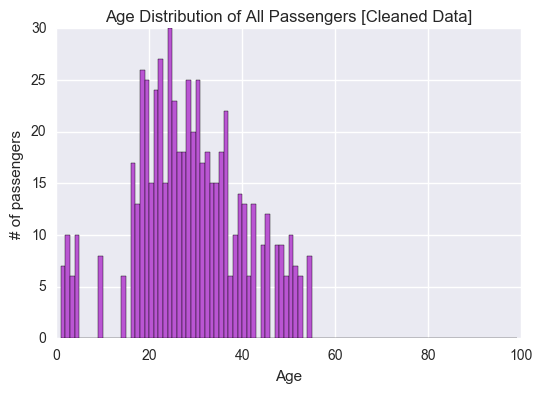

In [17]:
age_gt5_df['Age'].plot.hist(bins=range(100), color='mediumorchid')
plt.title('Age Distribution of All Passengers [Cleaned Data]')
plt.xlabel('Age')
plt.ylabel('# of passengers')
plt.show()

Our data set is still approximately normally distributed after the modification as expected.

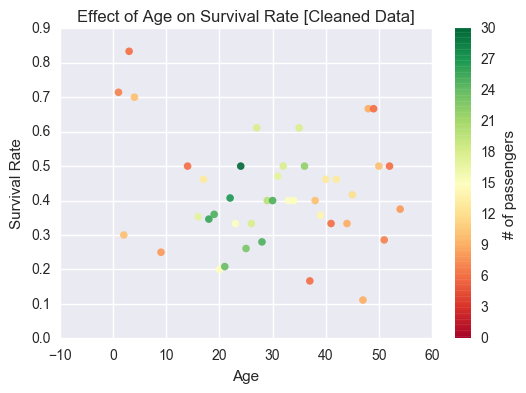

In [18]:
# Group data by age 
age_gt5_data = age_gt5_df.groupby('Age', as_index = False)
age_gt5_mean_data = age_gt5_data.mean()

# Determine number of passengers in age group and put into new list
num_passengers_in_age_gt5 = age_gt5_data.count()['PassengerId']

# Re-plot survival rates by age on scatter plot
scatter_plot2 = plt.scatter(age_gt5_list, age_gt5_mean_data['Survived'], s = 30, \
    alpha = 0.9, c = num_passengers_in_age_gt5, cmap='RdYlGn', edgecolors='none', vmin = 0, vmax = 30)
plt.title('Effect of Age on Survival Rate [Cleaned Data]')
plt.colorbar(scatter_plot2, label = '# of passengers')
plt.ylabel('Survival Rate')
plt.xlabel('Age')
plt.show()

From the new scatter plot, we can see there aren't any ages where there is a 100% survival rate and 0% survival rate. Additionally, there are no dark red markers. This new plot should be more representative as each age in this plot has a sample size greater than 5.

With this more representative data set, let's quantify the correlation between age and survival rate.

In [19]:
# Define function to calculate Pearson's R and R^2 value
def correlation(x, y):
    std_x = (x - x.mean())/x.std(ddof=0)
    std_y = (y - y.mean())/y.std(ddof=0)
    combined = std_x * std_y
    r = combined.mean()
    return r, r**2

# Find correlation between age and survival rate
age_survival_correlation = correlation(age_gt5_mean_data['Age'], age_gt5_mean_data['Survived'])
print "Pearson's R: " + str(age_survival_correlation[0]) + "\nR^2: " + str(age_survival_correlation[1])

Pearson's R: -0.141815063089
R^2: 0.0201115121189


A Pearson's R of -0.14 indicates that a very weak inverse relationship between age and survival rate. This if further supported by calculating a R-squared value of 0.02. This means that only 2% of the variance in the survival rate can be explained by age.

Out of curiosity, let's split the cleaned data into survivors and non-survivors and calculate the average age.

In [20]:
# Group data by survivors
survivor_data = age_gt5_df.groupby('Survived', as_index = False)
survivor_mean_data = survivor_data.mean()
print survivor_mean_data['Age']

0    28.403315
1    28.485944
Name: Age, dtype: float64


As expected, the absolute age difference between survivors and non-survivors has dramatically decreased to only a fraction of a year (0.1 years vs 2.4 years). Interestingly, with the cleaned data the average age of survivors is now greater than the average age of non-survivors (28.5 years vs 28.4 years). 

With such a small difference in average ages between the survivors and non-survivors and a nearly zero R-squared value, we can conclude that there is likely not a correlation between age and survival rate (outside the comparison between children and adults).

An important thing to note is that the modification above was only made for the purposes of determine the effect of age on survival rate. For the rest of the analysis, the *embark_wrangled_data* dataframe will be used.

### Effect of Socio-Economic Status

Lastly, we will examine the effect of socio-economic status (SES) on survival rate. Though both ticket class and fare rate can be indicators of SES, we will focus on investigating ticket class as that is explicitly stated as a proxy for SES by the data dictionary. Fare rate and ticket class can be expected to be inversely proportional; a 1st class ticket is likely to cost more than a 3rd class ticket. A 1st class ticket is of higher luxury than a 3rd class ticket. An important and reasonable assumption made is that passengers who purchase a better class ticket have a higher SES.

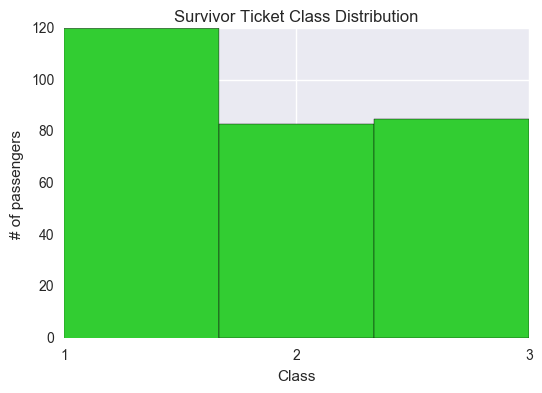

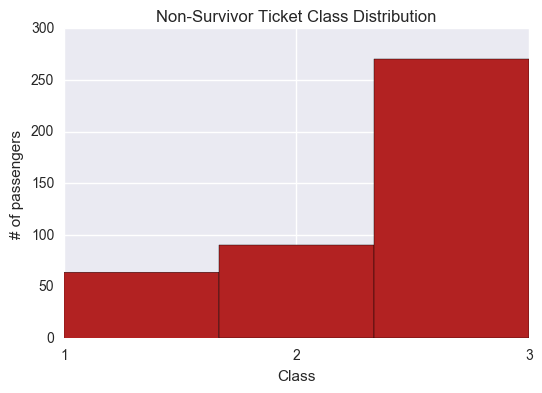

In [21]:
# Plot survivor class histogram
survived_data['Pclass'].hist(bins=3, color='limegreen', label='Survived')
plt.xlabel('Class')
plt.xticks(range(1,4))
plt.title('Survivor Ticket Class Distribution')
plt.ylabel('# of passengers')
plt.show()

# Plot non-survivor class histogram
died_data['Pclass'].hist(bins=3, color='firebrick', label='Died')
plt.xlabel('Class')
plt.xticks(range(1,4))
plt.title('Non-Survivor Ticket Class Distribution')
plt.ylabel('# of passengers')
plt.show()

From the above histograms, the distribution of survivors is positively skewed with the majority of survivors holding a 1st class ticket while the distribution of non-survivors was negatively skewed with the majority of non-survivors holding a 3rd class ticket. 

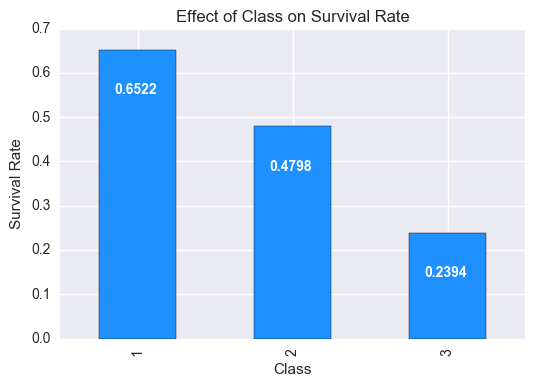

In [22]:
# Group total data by class
class_data = embark_wrangled_df.groupby('Pclass', as_index = False)
class_mean_data = class_data.mean()

# Create list of mean survival rates by class
class_survival_list = class_mean_data['Survived'].tolist()

# Plot mean survival rates by class
class_mean_data['Survived'].plot.bar(color='dodgerblue')
plt.title('Effect of Class on Survival Rate')
plt.xlabel('Class')
plt.xticks(np.arange(3), class_mean_data['Pclass'])
plt.ylabel('Survival Rate')

# Add bar label
create_value_labels(class_survival_list, 4, -0.15, -0.1)

plt.show()

In [23]:
# Find correlation between ticket class and survival rate
class_survival_correlation = correlation(class_mean_data['Pclass'], class_mean_data['Survived'])
print "Pearson's R: " + str(class_survival_correlation[0]) + "\nR^2: " + str(class_survival_correlation[1])

Pearson's R: -0.995516078289
R^2: 0.991052262131


From the bar graph 'Effect of Class on Survival Rate', it is evident that passengers with a more luxurious class ticket had a greater survival rate. 1st class ticket holders were 1.4x more likely to survive than 2nd class ticket holders (65.2% vs 48.0%). Furthermore, passengers with a 1st class ticket were 2.7x more likely to survive than passengers with a 3rd class ticket (65.2% vs 23.9%). Lastly, 2nd class ticket holders were 2x more likely to survive than 3rd class ticket holders (48.0% vs 23.9%).


A Pearson's R value of -0.996 confirms that there is a strong negative relationship between class ticket nominal value and survival rate (positive relationship between class ticket luxury and survival rate). A high R-squared value of 0.991 indicates that 99.1% of the variance in the survival rate can be predicted by ticket class.

A possible explanation for higher SES resulting in higher survivability is passenger cabin location. Typically, more expensive cabins are located on the top floors of the ship. The cheapest cabins are those that are towards the bottom of the ship were there is rarely a window. Being at the top floors of the ship results in less distance needed to be traveled to get to the lifeboats. Thus, it is likely passengers on the top floors could reach the lifeboats quicker than those who resided in the bottom cabins. Further analysis of passenger's cabin locations will be needed to support this explanation.

### Conclusion

As stated before, there are a plethora of characteristics that may affect why an particular individual was able to survive the Titanic. Our analysis explored the effect of gender, age, and socio-economic status (SES) on survival rate.

#### Key Findings

- **Gender:** Women were more than 3x likely to survive than men.
- **Age:** Children were 1.3x more likely to survive than adults. Outside of the age groups, age has essentially no correlation to survivability.
- **SES:** Passengers with a 1st class and 2nd class ticket were 2.7x and 2x, respectively, more likely to survive than passengers with a 3rd class ticket.

With these results, it's not a surprise as to why Rose DeWitt-Bukater, a 17-year-old girl with a 1st class ticket, survived during the Titanic movie and Jack Dawson, a 19 year old guy with a 3rd class ticket, did not.

#### Limitations
There are important limitations of the conclusions of this report. One for instance is that data was only collected on 891 of the 2224 passengers on board the Titanic. Thus, results of this report are can only be attributed to the passengers in that collective sample. However, the results of this conclusion can be used as model to predict the outcome of unseen data. Further testing of this model on the passengers not included in the data set is needed to confirm the accuracy of our conclusions.

#### Future Analysis Directions 
Of the many other charcteristics left unexplored, passenger cabin location is of particular interest. During the data wrangling phase, we determined 687 of the passengers did not have a cabin location in their data profile. Because it is likely one person had booked the cabin for many passengers (i.e. their relatives), correlating other data, such as last names may help provide information of the cabins for some of the other passengers. Being able to map passengers to their positions on the ship via a scatter plot may provide interesting results as to whether the passengers were in their cabins at the time the ship started to sink. Further data gathering of cabin number to location on the ship is needed to substantiate this analysis.

### Sources
- https://stackoverflow.com/questions/944700/how-to-check-for-nan-in-python 
- https://chrisalbon.com/python/pandas_dropping_column_and_rows.html
- https://stackoverflow.com/questions/26266362/how-to-count-the-nan-values-in-the-column-in-panda-data-frame
- https://stackoverflow.com/questions/13413590/how-to-drop-rows-of-pandas-dataframe-whose-value-in-certain-columns-is-nan
- https://stackoverflow.com/questions/11346283/renaming-columns-in-pandas
- https://measuringu.com/ab-cal/
- http://www.history.com/news/women-and-children-first-on-sinking-ships-its-every-man-for-himself
- https://stackoverflow.com/questions/30228069/how-to-display-the-value-of-the-bar-on-each-bar-with-pyplot-barh
- https://stackoverflow.com/questions/3373256/set-colorbar-range-in-matplotlib
- https://www.kaggle.com/c/titanic/data

### Data Dictionary

*From Kaggle Titanic Data webpage*

#### Variable

- **survival** - Survival (0 = No, 1 = Yes)
- **pclass** -Ticket class (1 = 1st, 2 = 2nd, 3 = 3rd)
- **sex** - Sex	
- **Age** - Age in years	
- **sibsp** - # of siblings / spouses aboard the Titanic	
- **parch** - # of parents / children aboard the Titanic	
- **ticket** - Ticket number	
- **fare** - Passenger fare	
- **cabin** - Cabin number	
- **embarked** - Port of Embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)

#### Variable Notes

- **pclass:** A proxy for socio-economic status (SES)
    - 1st = Upper
    - 2nd = Middle
    - 3rd = Lower

- **age:** Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

- **sibsp:** The dataset defines family relations in this way...
    - Sibling = brother, sister, stepbrother, stepsister
    - Spouse = husband, wife (mistresses and fiancés were ignored)

- **parch:** The dataset defines family relations in this way...
    - Parent = mother, father
    - Child = daughter, son, stepdaughter, stepson
    - Some children travelled only with a nanny, therefore parch=0 for them.